#**Predictive Customer Segmentation Analysis**

This project focuses on analyzing customer data from an online retail dataset, performing **exploratory data analysis (EDA)**, **data wrangling**, and clustering customers into segments using **K-means clustering**. The project aims to understand customer behavior and segment customers based on their purchasing patterns.

####**1. Data Loading and Analysis**
First, we load the dataset and perform initial data analysis to understand its structure and characteristics.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [ ]:
# Load the dataset
data = pd.read_csv('/content/sample_data/OnlineRetail.csv', encoding='ISO-8859-1')
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Data Analysis**

In [ ]:
data.shape

(175445, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175445 entries, 0 to 175444
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    175445 non-null  object 
 1   StockCode    175445 non-null  object 
 2   Description  174707 non-null  object 
 3   Quantity     175445 non-null  int64  
 4   InvoiceDate  175445 non-null  object 
 5   UnitPrice    175445 non-null  float64
 6   CustomerID   123156 non-null  float64
 7   Country      175444 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.7+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,175445.000000,175445.000000,123156.000000
mean,9.169415,5.107800,15286.333715
std,256.389246,100.467326,1728.637427
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13842.000000
50%,3.000000,2.250000,15179.000000
75%,10.000000,4.210000,16833.000000
max,74215.000000,16888.020000,18283.000000


####**2. Data Preprocessing**
Next, we clean the data by removing missing values and filtering out records with non-positive quantities and unit prices.

In [ ]:
data.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
175440,False,False,False,False,False,False,False,False
175441,False,False,False,False,False,False,False,False
175442,False,False,False,False,False,False,False,False
175443,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

InvoiceNo          0
StockCode          0
Description      738
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     52289
Country            1
dtype: int64

In [ ]:
# Preprocess data
data = data.dropna()
data = data[data['Quantity'] > 0]
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data = data[data['UnitPrice'] > 0]
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


####**3. Feature Engineering**
We create a new feature, **TotalPrice**, which is the product of **Quantity** and **UnitPrice**.

In [ ]:
# Feature engineering
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data['TotalPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
175439    12.50
175440    12.50
175441    12.50
175442    12.50
175443    12.50
Name: TotalPrice, Length: 120073, dtype: float64

####**4. Exploratory Data Analysis (EDA)**
We perform **EDA** to visualize the distribution of **TotalPrice** and other relevant **statistics**.

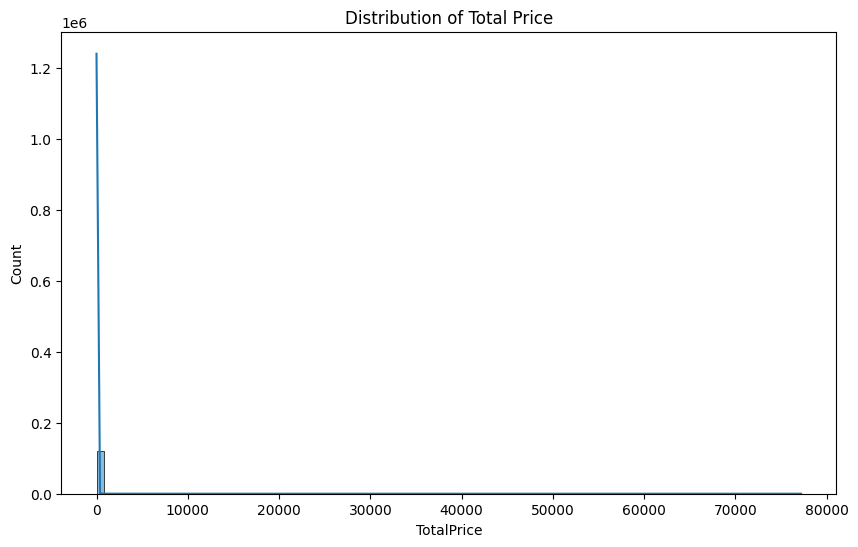

In [ ]:
# EDA
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPrice'], bins=100, kde=True)
plt.title('Distribution of Total Price')
plt.show()

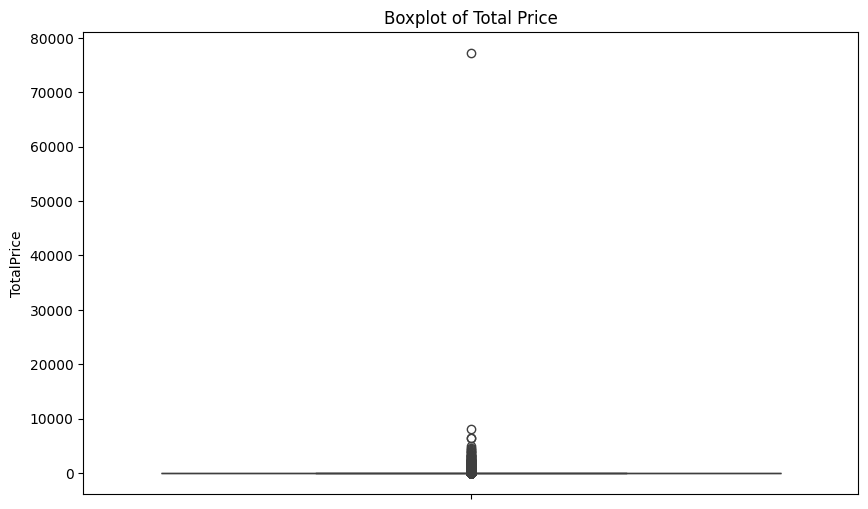

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['TotalPrice'])
plt.title('Boxplot of Total Price')
plt.show()

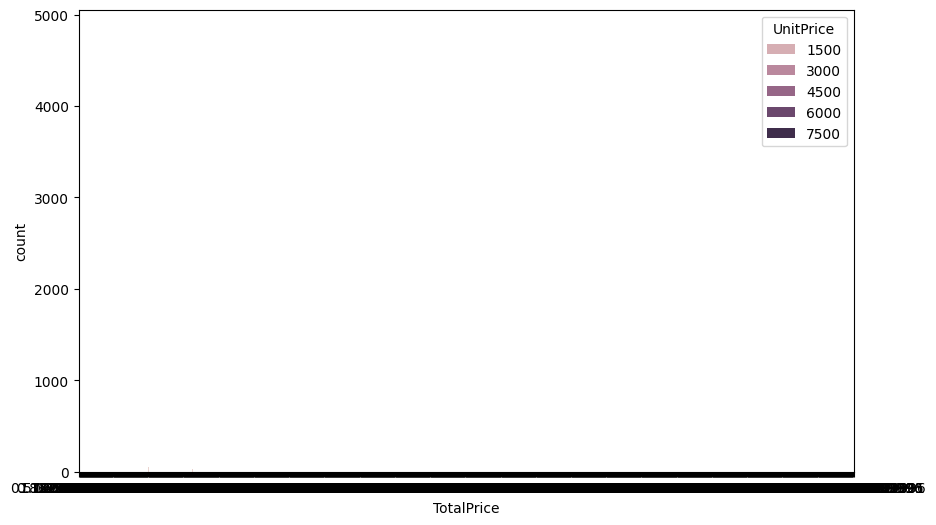

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'TotalPrice',hue = 'UnitPrice', data = data)
plt.show()

####**5. Data Aggregation**
We aggregate the data by customer to calculate the total spending and the number of transactions for each customer.

In [ ]:
# Aggregate data by customer
customer_data = data.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'count'
}).reset_index()
customer_data.rename(columns={'InvoiceNo': 'NumTransactions'}, inplace=True)

####**6. EDA on Aggregated Data**
We perform EDA on the aggregated data to visualize the distribution of total spending and the number of transactions per customer.

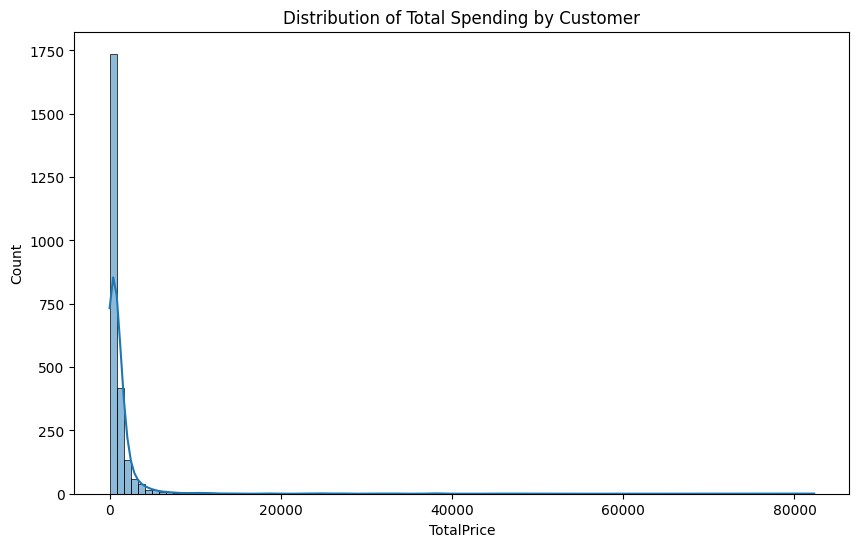

In [ ]:

# EDA on aggregated data
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['TotalPrice'], bins=100, kde=True)
plt.title('Distribution of Total Spending by Customer')
plt.show()

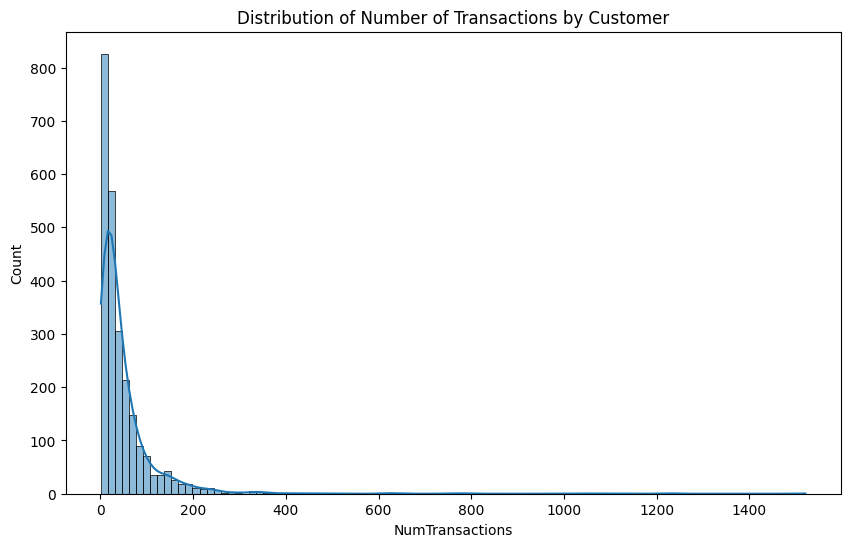

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['NumTransactions'], bins=100, kde=True)
plt.title('Distribution of Number of Transactions by Customer')
plt.show()

####**7. Data Wrangling**
We apply log transformation to handle skewness in the data.

In [ ]:
# Data wrangling
customer_data['TotalPrice'] = np.log1p(customer_data['TotalPrice'])  # Log transformation to handle skewness
customer_data['NumTransactions'] = np.log1p(customer_data['NumTransactions'])

####**8. Data Normalization**
We normalize the data using StandardScaler.

In [ ]:
# Normalize data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['TotalPrice', 'NumTransactions']])

####**9. K-means Clustering**
We perform K-means clustering to segment customers into different groups.

In [ ]:
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Evaluate clustering with silhouette score
silhouette_avg = silhouette_score(customer_data_scaled, customer_data['Cluster'])
print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.3636013855390935


####**10. Visualization of Clusters**
We visualize the customer segments using a scatter plot.

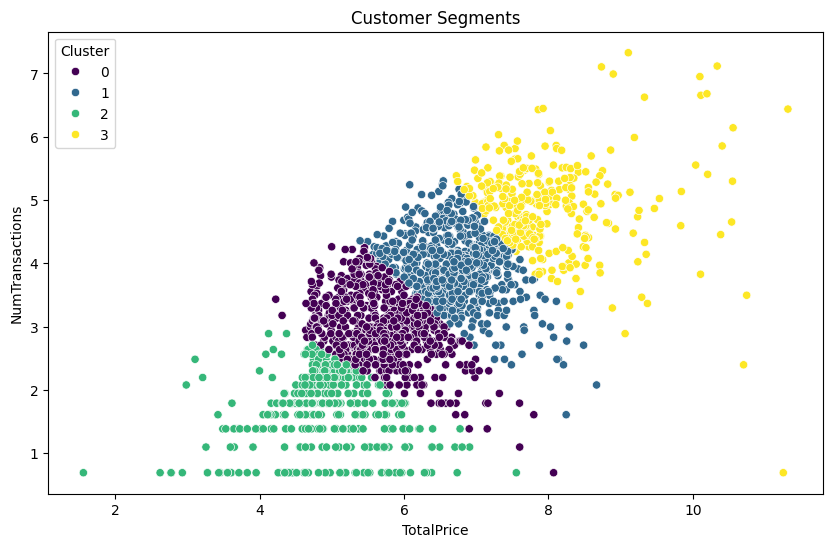

In [ ]:
# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPrice', y='NumTransactions', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segments')
plt.show()

####**11. Train-Test Split**
We split the data into training and testing sets for the supervised learning model.

In [ ]:
# Train-test split
X = customer_data[['TotalPrice', 'NumTransactions']]
y = customer_data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (1973, 2)
Test set shape: (494, 2)


####**12. Supervised Learning Model**
We train a Random Forest Classifier on the training set and evaluate its accuracy on the test set.

In [ ]:
# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777327935222672


####**Summary**
This project provides a comprehensive approach to customer segmentation for an e-commerce retail dataset. It includes data loading, preprocessing, feature engineering, EDA, data wrangling, clustering, and visualization of the results. The final train-test split prepares the data for a supervised learning model, which is then trained and evaluated for accuracy. Additionally, the silhouette score is computed to evaluate the quality of the clusters.